In [1]:
### Importing all the packages
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import re
import unicodedata
from nltk.corpus import stopwords

In [2]:
## Making our google query ready
topic="AI"
numResults=1000
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
results = soup.find_all("div", attrs = {"class": "ZINbbc"})

In [5]:
descriptions = []
for result in results:
    try:
        description = result.find("div", attrs={"class":"s3v9rd"}).get_text()
        if description != "": 
            descriptions.append(description)
    except:
        continue

In [6]:
text = "".join(descriptions)

In [7]:
#### Cleaning text 
### reference (https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py)

def removetitle(text):
    return re.sub(r'.*:', '', text)

def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

def lemmatize(text):
    text = nlp(text)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])


In [8]:
text_title=removetitle(text)
text_brackets=removebrackets(text_title)
text_clean=remove_accented_chars(text_brackets)
text_clean=text_clean.lower()
text_clean=remove_special_chars(text_clean)
text_clean=remove_stopwords(text_clean)

In [9]:
## To check if your function worked on the text 
text==text_clean

False

In [10]:
## Our resultant text
text_clean

'ai leading enterprise ai software provider today announced president chief product officer houman behzadi will1 hour ago voicify along companies work closely google product teams across voice ui well ai excited working9 hours ago ai video maker new feature automatically generates promotional videos existing 360 images artificial intelligence6 hours ago today want set hopes bill relation artificial intelligence ai already pervasive across many aspects lives3 hours ago better diagnosis disease predictions assisted ai analytics lead cost reduction decreasing hospital readmission rates6 hours ago intsite utilizes ai machine learning algorithms combined offtheshelf hardware heavymachinery improve efficiency safety2 hours ago ai adoption moving fast new data kpmg provides comprehensive look impact artificial intelligence one9 hours ago addition improving consumer experience investing ai impact companys bottom line providing better data hygiene entity3 hours ago hong kong march 9 2021 prnews

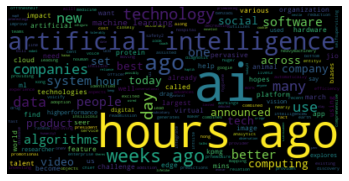

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_clean)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

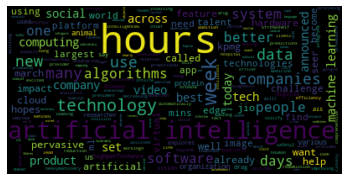

In [12]:
### By adding some more stops words in list 
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour'])).generate(text_clean)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Here we are trying a different method to clean text we are taking only nouns and making text lower 

In [13]:
nltk.download('averaged_perceptron_tagger')
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(text)
nouns = [word.lower() for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
text_noun = " ".join(nouns)

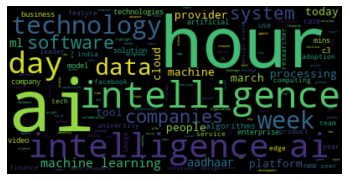

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_noun)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

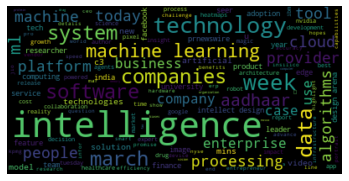

In [16]:
### By adding some more stops words in list
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour','hours','days'])).generate(text_noun)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualization of the unigram, bigram, and trigram on the text data

ago 100
ai 99
hours 66
artificial 41
intelligence 40
2021 13
technology 11
data 10
new 10
day 9
machine 9
learning 9
weeks 9
companies 8
march 8
software 8
hour 7
announced 7
best 7
ml 6


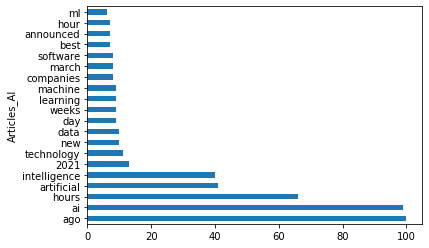

In [17]:
### Visualizing unigrams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from plotly.offline import iplot
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Articles_AI' , 'count'])
df2.groupby('Articles_AI').sum()['count'].sort_values(ascending=False).plot(
    kind='barh')


hours ago 65
artificial intelligence 40
intelligence ai 19
ago ai 12
day ago 9
weeks ago 9
machine learning 8
hour ago 7
ago artificial 7
march 2021 6
ai software 6
ai ml 5
days ago 5
mins ago 4
ago c3 4
c3 ai 4
intellect design 3
design arena 3
magic aadhaar 3
ai powered 3


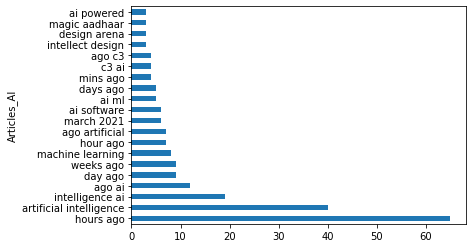

In [18]:
## Visualizing bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Articles_AI' , 'count'])
df4.groupby('Articles_AI').sum()['count'].sort_values(ascending=False).plot(
    kind='barh')


artificial intelligence ai 19
hours ago ai 8
ago artificial intelligence 7
hours ago c3 4
ago c3 ai 4
intellect design arena 3
weeks ago artificial 3
hours ago using 3
march 2021 prnewswire 3
ai machine learning 3
enterprise ai software 3
ai software provider 3
hours ago artificial 3
18 hours ago 2
magic aadhaar ai 2
aadhaar ai powered 2
use artificial intelligence 2
15 hours ago 2
10 hours ago 2
hours ago best 2


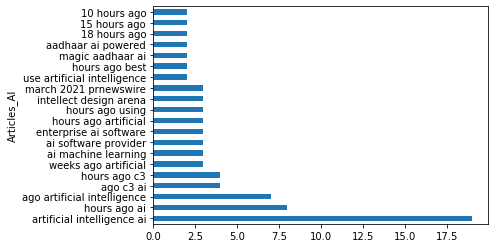

In [19]:
## Visualizing trigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Articles_AI' , 'count'])
df4.groupby('Articles_AI').sum()['count'].sort_values(ascending=False).plot(
    kind='barh')


## Let us see the most occuring POS tag in our corpus

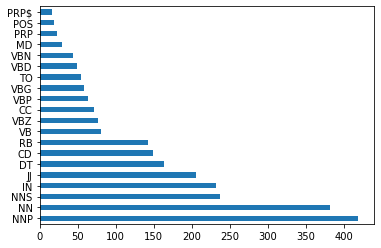

In [20]:
## Let us see which POS is most occuring 
from textblob import TextBlob
blob = TextBlob(str(descriptions))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='barh')

### Name entity Recognition

In [21]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
## Here we preprocess the word by tokenizing it and then tagging its parts of speech i.e. POS
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(text_clean)
sent


[('ai', 'NN'),
 ('leading', 'VBG'),
 ('enterprise', 'NN'),
 ('ai', 'NN'),
 ('software', 'NN'),
 ('provider', 'NN'),
 ('today', 'NN'),
 ('announced', 'VBD'),
 ('president', 'NN'),
 ('chief', 'JJ'),
 ('product', 'NN'),
 ('officer', 'NN'),
 ('houman', 'JJ'),
 ('behzadi', 'NN'),
 ('will1', 'WP'),
 ('hour', 'NN'),
 ('ago', 'RB'),
 ('voicify', 'VB'),
 ('along', 'IN'),
 ('companies', 'NNS'),
 ('work', 'VBP'),
 ('closely', 'RB'),
 ('google', 'JJ'),
 ('product', 'NN'),
 ('teams', 'NNS'),
 ('across', 'IN'),
 ('voice', 'NN'),
 ('ui', 'RB'),
 ('well', 'RB'),
 ('ai', 'RB'),
 ('excited', 'VBN'),
 ('working9', 'NN'),
 ('hours', 'NNS'),
 ('ago', 'RB'),
 ('ai', 'VBP'),
 ('video', 'NN'),
 ('maker', 'NN'),
 ('new', 'JJ'),
 ('feature', 'NN'),
 ('automatically', 'RB'),
 ('generates', 'VBZ'),
 ('promotional', 'JJ'),
 ('videos', 'NNS'),
 ('existing', 'VBG'),
 ('360', 'CD'),
 ('images', 'NNS'),
 ('artificial', 'JJ'),
 ('intelligence6', 'NN'),
 ('hours', 'NNS'),
 ('ago', 'RB'),
 ('today', 'NN'),
 ('want', 'VBP

In [22]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP ai/NN)
  leading/VBG
  (NP enterprise/NN)
  (NP ai/NN)
  (NP software/NN)
  (NP provider/NN)
  (NP today/NN)
  announced/VBD
  (NP president/NN)
  (NP chief/JJ product/NN)
  (NP officer/NN)
  (NP houman/JJ behzadi/NN)
  will1/WP
  (NP hour/NN)
  ago/RB
  voicify/VB
  along/IN
  companies/NNS
  work/VBP
  closely/RB
  (NP google/JJ product/NN)
  teams/NNS
  across/IN
  (NP voice/NN)
  ui/RB
  well/RB
  ai/RB
  excited/VBN
  (NP working9/NN)
  hours/NNS
  ago/RB
  ai/VBP
  (NP video/NN)
  (NP maker/NN)
  (NP new/JJ feature/NN)
  automatically/RB
  generates/VBZ
  promotional/JJ
  videos/NNS
  existing/VBG
  360/CD
  images/NNS
  (NP artificial/JJ intelligence6/NN)
  hours/NNS
  ago/RB
  (NP today/NN)
  want/VBP
  set/VBN
  hopes/NNS
  (NP bill/NN)
  relation/VBP
  (NP artificial/JJ intelligence/NN)
  ai/VBP
  already/RB
  pervasive/JJ
  across/IN
  many/JJ
  aspects/NNS
  lives3/VBP
  hours/NNS
  ago/RB
  better/JJR
  (NP diagnosis/NN)
  (NP disease/NN)
  predictions/NNS
  assis

In [23]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('ai', 'NN', 'B-NP'),
 ('leading', 'VBG', 'O'),
 ('enterprise', 'NN', 'B-NP'),
 ('ai', 'NN', 'B-NP'),
 ('software', 'NN', 'B-NP'),
 ('provider', 'NN', 'B-NP'),
 ('today', 'NN', 'B-NP'),
 ('announced', 'VBD', 'O'),
 ('president', 'NN', 'B-NP'),
 ('chief', 'JJ', 'B-NP'),
 ('product', 'NN', 'I-NP'),
 ('officer', 'NN', 'B-NP'),
 ('houman', 'JJ', 'B-NP'),
 ('behzadi', 'NN', 'I-NP'),
 ('will1', 'WP', 'O'),
 ('hour', 'NN', 'B-NP'),
 ('ago', 'RB', 'O'),
 ('voicify', 'VB', 'O'),
 ('along', 'IN', 'O'),
 ('companies', 'NNS', 'O'),
 ('work', 'VBP', 'O'),
 ('closely', 'RB', 'O'),
 ('google', 'JJ', 'B-NP'),
 ('product', 'NN', 'I-NP'),
 ('teams', 'NNS', 'O'),
 ('across', 'IN', 'O'),
 ('voice', 'NN', 'B-NP'),
 ('ui', 'RB', 'O'),
 ('well', 'RB', 'O'),
 ('ai', 'RB', 'O'),
 ('excited', 'VBN', 'O'),
 ('working9', 'NN', 'B-NP'),
 ('hours', 'NNS', 'O'),
 ('ago', 'RB', 'O'),
 ('ai', 'VBP', 'O'),
 ('video', 'NN', 'B-NP'),
 ('maker', 'NN', 'B-NP'),
 ('new', 'JJ', 'B-NP'),
 ('feature', 'NN', 'I-NP'),
 ('automa

In [24]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text_clean)))
print(ne_tree)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


(S
  ai/NN
  leading/VBG
  enterprise/NN
  ai/NN
  software/NN
  provider/NN
  today/NN
  announced/VBD
  president/NN
  chief/JJ
  product/NN
  officer/NN
  houman/JJ
  behzadi/NN
  will1/WP
  hour/NN
  ago/RB
  voicify/VB
  along/IN
  companies/NNS
  work/VBP
  closely/RB
  google/JJ
  product/NN
  teams/NNS
  across/IN
  voice/NN
  ui/RB
  well/RB
  ai/RB
  excited/VBN
  working9/NN
  hours/NNS
  ago/RB
  ai/VBP
  video/NN
  maker/NN
  new/JJ
  feature/NN
  automatically/RB
  generates/VBZ
  promotional/JJ
  videos/NNS
  existing/VBG
  360/CD
  images/NNS
  artificial/JJ
  intelligence6/NN
  hours/NNS
  ago/RB
  today/NN
  want/VBP
  set/VBN
  hopes/NNS
  bill/NN
  relation/VBP
  artificial/JJ
  intelligence/NN
  ai/VBP
  already/RB
  pervasive/JJ
  across/IN
  many/JJ
  aspects/NNS
  lives3/VBP
  hours/NNS
  ago/RB
  better/JJR
  diagnosis/NN
  disease/NN
  predictions/NNS
  assisted/VBD
  ai/JJ
  analytics/NNS
  lead/VBP
  cost/NN
  reduction/NN
  decreasing/VBG
  hospital/JJ
  re

What it means ?
* B-NP : beginning of a noun phrase
* I-NP : descibes that the word is inside of the current noun phrase.
* O : end of the sentence.
* B-VP and I-VP : beginning and inside of a verb phrase.

## Sentiment analyisis with Textblob

In [25]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in descriptions]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [26]:
sentiment=pd.DataFrame()
sentiment['article']=descriptions
sentiment['sentiments']=sentiment_category_tb

In [27]:
sentiment.head().T

,0,1,2,3,4
article,1 hour ago · Understanding the underlying data...,1 hour ago · Bengaluru: US-based tech majors N...,18 hours ago · India Business News: Chennai: F...,7 hours ago · Eros Now on Tuesday said it had ...,"7 hours ago · Ericsson, Telia, and Sahlgrenska..."
sentiments,positive,negative,positive,negative,negative


## References:
* https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc
* https://medium.com/illumination/scraping-news-and-creating-a-word-cloud-in-python-10ea312c49ba
* https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
* https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
